In [1]:
# Building upon housing, parks, and income data

In [2]:
# By: Adriana Valencia Wences

In [3]:
# first I will import my libraries
# pandas for data analysis
import pandas as pd
# geopandas for spatial analysis
import geopandas as gpd
# contextily for basemaps
import contextily as ctx
# networkx for network analysis
import networkx as nx
# for street network analysis
import osmnx as ox
import matplotlib.pyplot as plt

In [4]:
#import the LAC Affordable Housing data
LAC_aff_housing_clean = gpd.read_file('data/lac_clean_FINAL.csv')

In [5]:
#look at data
LAC_aff_housing_clean.head()

PropertyName      PropertyAddress       City State         Zip  \
0       GOOD SHEPHERD HOMES    510 Centinela Ave  Inglewood    CA  90302-3246   
1               GRACE MANOR        508 Grace Ave  Inglewood    CA  90301-1338   
2       HOMEWARD BOUND 2000   419 E Tamarack Ave  Inglewood    CA  90301-6309   
3  HOMEWARD BOUND-INGLEWOOD      550 W Regent St  Inglewood    CA  90301-1080   
4    PACIFIC RIM APARTMENTS  230 S Grevillea Ave  Inglewood    CA  90301-2349   

        County CountyCode CensusTract CongressionalDistrict   Latitude  \
0  Los Angeles       6037  6037600902                    43   33.97285   
1  Los Angeles       6037  6037601001                    43  33.968018   
2  Los Angeles       6037  6037601002                    43   33.95925   
3  Los Angeles       6037  6037601401                    43   33.96387   
4  Los Angeles       6037  6037601211                    43   33.96085   

     Longitude TargetTenantType S8_1_ProgramName LIHTC_1_ProgramName geometry  
0   -118.34935         Disabled         202/8 NC       4% Tax Credit     None  
1  -118.348181         Disabled         PRAC/811                         None  
2   -118.34798         Disabled         PRAC/811                         None  
3   -118.36551         Disabled         PRAC/811                         None  
4    -118.3543         Disabled         202/8 NC                         None

In [6]:
# managed to clean up the data from the chart before, now I will plot the data by city and site numbers
# first, make a list of categories in dataset
list(LAC_aff_housing_clean)

['PropertyName',
 'PropertyAddress',
 'City',
 'State',
 'Zip',
 'County',
 'CountyCode',
 'CensusTract',
 'CongressionalDistrict',
 'Latitude',
 'Longitude',
 'TargetTenantType',
 'S8_1_ProgramName',
 'LIHTC_1_ProgramName',
 'geometry']

In [7]:
# how many affordable housing projects per city?
LAC_aff_housing_clean['City'].value_counts()

Los Angeles    867
Long Beach      48
Pasadena        34
Palmdale        22
Inglewood       16
Name: City, dtype: int64

In [8]:
# I managed to group all neighborhoods of LA City into "Los Angeles," which is why the number of sites grew. Now I will save this data as a value.
site_count = LAC_aff_housing_clean['City'].value_counts()

In [9]:
# now save it as a dataframe
site_count = site_count.reset_index()

In [10]:
# rename as a list
site_count.columns.to_list()

['index', 'City']

In [11]:
# rename the columns
site_count.columns = ['City', 'Number of Sites']

In [12]:
# look at what we made
site_count

City  Number of Sites
0  Los Angeles              867
1   Long Beach               48
2     Pasadena               34
3     Palmdale               22
4    Inglewood               16

<AxesSubplot:>

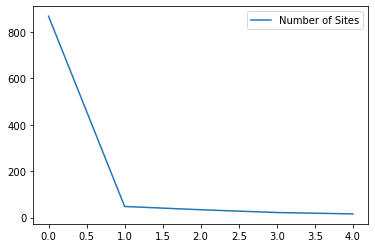

In [13]:
# plot it
site_count.plot()

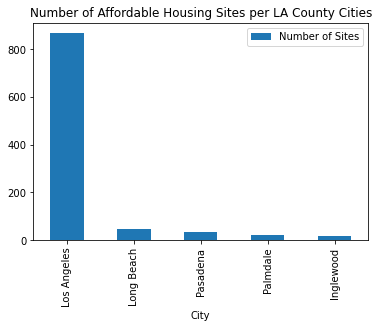

In [14]:
# provide arguments to plot
site_count.plot.bar(x = 'City', y = 'Number of Sites', title = 'Number of Affordable Housing Sites per LA County Cities')
figsize = (20,20)

In [15]:
# Trimming the data: output the original data's info
LAC_aff_housing_clean.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   PropertyName           987 non-null    object  
 1   PropertyAddress        987 non-null    object  
 2   City                   987 non-null    object  
 3   State                  987 non-null    object  
 4   Zip                    987 non-null    object  
 5   County                 987 non-null    object  
 6   CountyCode             987 non-null    object  
 7   CensusTract            987 non-null    object  
 8   CongressionalDistrict  987 non-null    object  
 9   Latitude               987 non-null    object  
 10  Longitude              987 non-null    object  
 11  TargetTenantType       987 non-null    object  
 12  S8_1_ProgramName       987 non-null    object  
 13  LIHTC_1_ProgramName    987 non-null    object  
 14  geometry               0 non-null 

In [16]:
# show a dataframe with a subset of columns
LAC_aff_housing_clean[['PropertyName','City','Zip','Latitude','Longitude','TargetTenantType','S8_1_ProgramName','LIHTC_1_ProgramName']]

PropertyName       City         Zip   Latitude  \
0                GOOD SHEPHERD HOMES  Inglewood  90302-3246   33.97285   
1                        GRACE MANOR  Inglewood  90301-1338  33.968018   
2                HOMEWARD BOUND 2000  Inglewood  90301-6309   33.95925   
3           HOMEWARD BOUND-INGLEWOOD  Inglewood  90301-1080   33.96387   
4             PACIFIC RIM APARTMENTS  Inglewood  90301-2349   33.96085   
..                               ...        ...         ...        ...   
982      WASHINGTON VILLA APARTMENTS   Pasadena  91104-2195   34.16879   
983  EUCLID VILLA TRANSITION HOUSING   Pasadena  91101-4666   34.14278   
984             ORANGE GROVE GARDENS   Pasadena  91104-5306   34.15775   
985                   KINGS VILLAGES   Pasadena  91103-2513  34.165907   
986                  HERITAGE SQUARE   Pasadena  91103-3083   34.15893   

       Longitude TargetTenantType S8_1_ProgramName LIHTC_1_ProgramName  
0     -118.34935         Disabled         202/8 NC       4% Tax Credit  
1    -118.348181         Disabled         PRAC/811                      
2     -118.34798         Disabled         PRAC/811                      
3     -118.36551         Disabled         PRAC/811                      
4      -118.3543         Disabled         202/8 NC                      
..           ...              ...              ...                 ...  
982   -118.14527           Family                        9% Tax Credit  
983    -118.1428           Family                        9% Tax Credit  
984    -118.1449           Family                        9% Tax Credit  
985  -118.152628           Family    PD/8 Existing       4% Tax Credit  
986  -118.150419                                         9% Tax Credit  

[987 rows x 8 columns]

In [17]:
# list of desired column names
desired_columns = ['PropertyName','City','Zip','Latitude','Longitude','TargetTenantType','S8_1_ProgramName','LIHTC_1_ProgramName']

# subset based on desired columns
LAC_aff_housing_clean[desired_columns].sample(5)

PropertyName         City         Zip  Latitude   Longitude  \
502                CASA SHALOM  Los Angeles  90006-4555  34.04717  -118.29233   
544  BARBIZON HOTEL APARTMENTS  Los Angeles  90057-5222  34.05868  -118.27272   
901      PARK PLACE APARTMENTS  Los Angeles  91402-6316  34.21579  -118.43088   
150        HUBBARD STREET ARMS  Los Angeles  90023-1844  34.02659   -118.1909   
219                MARTEL PARK  Los Angeles       90046  34.08782   -118.3512   

    TargetTenantType S8_1_ProgramName LIHTC_1_ProgramName  
502           Family                        4% Tax Credit  
544           Family                        4% Tax Credit  
901                                         4% Tax Credit  
150           Family             LMSA                      
219          Elderly         Sec 8 NC

In [18]:
aff_housing_trimmed = LAC_aff_housing_clean[desired_columns].copy()
aff_housing_trimmed

PropertyName       City         Zip   Latitude  \
0                GOOD SHEPHERD HOMES  Inglewood  90302-3246   33.97285   
1                        GRACE MANOR  Inglewood  90301-1338  33.968018   
2                HOMEWARD BOUND 2000  Inglewood  90301-6309   33.95925   
3           HOMEWARD BOUND-INGLEWOOD  Inglewood  90301-1080   33.96387   
4             PACIFIC RIM APARTMENTS  Inglewood  90301-2349   33.96085   
..                               ...        ...         ...        ...   
982      WASHINGTON VILLA APARTMENTS   Pasadena  91104-2195   34.16879   
983  EUCLID VILLA TRANSITION HOUSING   Pasadena  91101-4666   34.14278   
984             ORANGE GROVE GARDENS   Pasadena  91104-5306   34.15775   
985                   KINGS VILLAGES   Pasadena  91103-2513  34.165907   
986                  HERITAGE SQUARE   Pasadena  91103-3083   34.15893   

       Longitude TargetTenantType S8_1_ProgramName LIHTC_1_ProgramName  
0     -118.34935         Disabled         202/8 NC       4% Tax Credit  
1    -118.348181         Disabled         PRAC/811                      
2     -118.34798         Disabled         PRAC/811                      
3     -118.36551         Disabled         PRAC/811                      
4      -118.3543         Disabled         202/8 NC                      
..           ...              ...              ...                 ...  
982   -118.14527           Family                        9% Tax Credit  
983    -118.1428           Family                        9% Tax Credit  
984    -118.1449           Family                        9% Tax Credit  
985  -118.152628           Family    PD/8 Existing       4% Tax Credit  
986  -118.150419                                         9% Tax Credit  

[987 rows x 8 columns]

In [19]:
type(aff_housing_trimmed)

pandas.core.frame.DataFrame

In [20]:
aff_housing_trimmed.dtypes

PropertyName           object
City                   object
Zip                    object
Latitude               object
Longitude              object
TargetTenantType       object
S8_1_ProgramName       object
LIHTC_1_ProgramName    object
dtype: object

In [21]:
# lat long data will not read unless it is a float, so I will convert them
aff_housing_trimmed['Latitude'] = aff_housing_trimmed['Latitude'].astype(float)

In [22]:
aff_housing_trimmed.dtypes

PropertyName            object
City                    object
Zip                     object
Latitude               float64
Longitude               object
TargetTenantType        object
S8_1_ProgramName        object
LIHTC_1_ProgramName     object
dtype: object

In [23]:
aff_housing_trimmed['Longitude'] = aff_housing_trimmed['Longitude'].astype(float)

In [24]:
aff_housing_trimmed.dtypes

PropertyName            object
City                    object
Zip                     object
Latitude               float64
Longitude              float64
TargetTenantType        object
S8_1_ProgramName        object
LIHTC_1_ProgramName     object
dtype: object

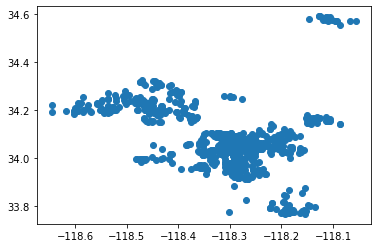

In [25]:
plt.scatter(x=aff_housing_trimmed['Longitude'], y=aff_housing_trimmed['Latitude'])
plt.show()


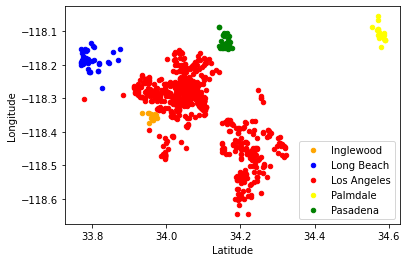

In [26]:
fig, ax = plt.subplots()

colors = {'Los Angeles':'red', 'Long Beach':'blue', 'Pasadena':'green', 'Palmdale':'yellow', 'Inglewood':'orange'}

grouped = aff_housing_trimmed.groupby('City')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Latitude', y='Longitude', label=key, color=colors[key])

plt.show()

In [27]:
# each color represents a city! now to map with folium
import folium

In [28]:
# default folium map
m = folium.Map()
m

In [29]:
# average latitude
latitude = aff_housing_trimmed.Latitude.mean()
latitude

34.077650696048615

In [30]:
# average longitude
longitude = aff_housing_trimmed.Longitude.mean()
longitude

-118.3079924447822

In [31]:
#centering based on average latitude / longitude means
m = folium.Map(location=[34.077650696048615,-118.3079924447822])
m

In [32]:
# loop through a dataframe:
for index, row in aff_housing_trimmed.iterrows():
    print(row.PropertyName, row.Latitude, row.Longitude)

GOOD SHEPHERD HOMES 33.97285 -118.34935
GRACE MANOR 33.968018 -118.348181
HOMEWARD BOUND 2000 33.95925 -118.34798
HOMEWARD BOUND-INGLEWOOD 33.96387 -118.36551
PACIFIC RIM APARTMENTS 33.96085 -118.3543
REGENT PLAZA 33.96449 -118.35738
REGENCY TOWERS 33.96396 -118.35082
OSAGE SENIOR VILLAS 33.95163 -118.34513
PATH VILLAS OSAGE APARTMENTS 33.953472 -118.34496
REGENT SQUARE 33.964873 -118.365319
WESTSIDE II 33.953836 -118.374435
EUCALYPTUS PARK 33.97357 -118.36016
INGLEWOOD MEADOWS 33.96298 -118.35027
MARKET PARK APARTMENTS 33.97124 -118.35549
PATH VILLAS EUCALYPTUS 33.957601 -118.358778
OSAGE APARTMENTS 33.9337 -118.34546
MERIT HALL APARTMENTS 33.7798 -118.17985
DEL AMO GARDENS 33.826 -118.2694
AMERICAN GOLD STAR MANOR 33.814303 -118.217892
PARK PACIFIC TOWER 33.775673 -118.193323
SEAMIST TOWER 33.784667 -118.185159
LONG BEACH MANOR 33.796523 -118.134524
BELMENO MANOR 33.801826 -118.144632
SCHERER PARK APARTMENTS 33.842607 -118.191831
BEACHWOOD APARTMENTS 33.77443 -118.19842
PACIFIC COAST

In [33]:
# add the zipcodes
for index, row in aff_housing_trimmed.iterrows():
    # add folium marker code
    folium.Marker([row.Latitude, row.Longitude], popup=row.PropertyName, tooltip=row.PropertyName).add_to(m)
m

In [34]:
# add a new column
aff_housing_trimmed['blue'] = 'Long Beach'
aff_housing_trimmed['green'] = 'Pasadena'
aff_housing_trimmed['purple'] = 'Inglewood'
aff_housing_trimmed['orange'] = 'Palmdale'
aff_housing_trimmed['gray'] = 'Los Angeles'

In [35]:
aff_housing_trimmed.head()

PropertyName       City         Zip   Latitude   Longitude  \
0       GOOD SHEPHERD HOMES  Inglewood  90302-3246  33.972850 -118.349350   
1               GRACE MANOR  Inglewood  90301-1338  33.968018 -118.348181   
2       HOMEWARD BOUND 2000  Inglewood  90301-6309  33.959250 -118.347980   
3  HOMEWARD BOUND-INGLEWOOD  Inglewood  90301-1080  33.963870 -118.365510   
4    PACIFIC RIM APARTMENTS  Inglewood  90301-2349  33.960850 -118.354300   

  TargetTenantType S8_1_ProgramName LIHTC_1_ProgramName        blue     green  \
0         Disabled         202/8 NC       4% Tax Credit  Long Beach  Pasadena   
1         Disabled         PRAC/811                      Long Beach  Pasadena   
2         Disabled         PRAC/811                      Long Beach  Pasadena   
3         Disabled         PRAC/811                      Long Beach  Pasadena   
4         Disabled         202/8 NC                      Long Beach  Pasadena   

      purple    orange         gray  
0  Inglewood  Palmdale  Los Angeles  
1  Inglewood  Palmdale  Los Angeles  
2  Inglewood  Palmdale  Los Angeles  
3  Inglewood  Palmdale  Los Angeles  
4  Inglewood  Palmdale  Los Angeles

In [36]:
# find unique values in the City column
aff_housing_trimmed.City.unique()

array(['Inglewood', 'Long Beach', 'Los Angeles', 'Palmdale', 'Pasadena'],
      dtype=object)

In [37]:
# display rows that match a query
aff_housing_trimmed.loc[aff_housing_trimmed['City'] == 'Long Beach']

PropertyName        City         Zip  \
16                         MERIT HALL APARTMENTS  Long Beach  90813-3682   
17                               DEL AMO GARDENS  Long Beach       90745   
18                      AMERICAN GOLD STAR MANOR  Long Beach  90810-2708   
19                            PARK PACIFIC TOWER  Long Beach  90813-4234   
20                                 SEAMIST TOWER  Long Beach  90813-2076   
21                              LONG BEACH MANOR  Long Beach  90815-2522   
22                                 BELMENO MANOR  Long Beach  90815-1704   
23                       SCHERER PARK APARTMENTS  Long Beach  90805-6961   
24                          BEACHWOOD APARTMENTS  Long Beach  90802-1109   
25                           PACIFIC COAST VILLA  Long Beach  90806-5520   
26                                  CASA CORAZON  Long Beach  90802-2428   
27                            CASITAS DEL MAR II  Long Beach  90813-3519   
28                     NORTHPOINTE APARTMENTS II  Long Beach  90805-5128   
29                              FEDERATION TOWER  Long Beach  90815-1734   
30                               LUTHERAN TOWERS  Long Beach  90814-1173   
31                             CASITAS DEL MAR I  Long Beach  90813-4981   
32                                 PLYMOUTH WEST  Long Beach  90802-2949   
33                                 NEW HOPE HOME  Long Beach  90813-2217   
34                                COVENANT MANOR  Long Beach  90802-2681   
35                            PROVIDENCE GARDENS  Long Beach  90813-3149   
36                           CASITAS DEL MAR III  Long Beach  90813-2312   
37                               ST MARY'S TOWER  Long Beach  90813-3378   
38                     LONG BEACH SENIOR HOUSING  Long Beach  90806-3180   
39      CITYVIEW APARTMENTS (FKA BRETHREN MANOR)  Long Beach  90806-1259   
40                             BEECHWOOD TERRACE  Long Beach  90813-3299   
41                      PACIFIC COURT APARTMENTS  Long Beach  90802-3000   
42                               CAMBRIDGE PLACE  Long Beach  90806-7386   
43                              SEA GATE VILLAGE  Long Beach  90813-5626   
44                          VILLAGES AT CABRILLO  Long Beach  90810-3622   
45             SPRINGDALE WEST APARTMENTS I & II  Long Beach  90810-2696   
46                    FAMILY COMMONS AT CABRILLO  Long Beach  90810-3627   
47                     GRISHAM COMMUNITY HOUSING  Long Beach  90805-7704   
48                              DECRO LONG BEACH  Long Beach  90813-4700   
49                           PACIFIC CITY LIGHTS  Long Beach  90813-6703   
50                          EVERGREEN APARTMENTS  Long Beach  90804-1774   
51                         ELM AVENUE APARTMENTS  Long Beach  90802-2413   
52                     PUERTO DEL SOL APARTMENTS  Long Beach  90802-2709   
53                 LONG BEACH BURNETT APARTMENTS  Long Beach  90806-3289   
54                            CASITAS DEL MAR IV  Long Beach  90813-4733   
55                                  PALACE HOTEL  Long Beach  90804-1209   
56                      COURTYARDS IN LONG BEACH  Long Beach       90804   
57              LONG BEACH SENIOR ARTISTS COLONY  Long Beach  90813-5432   
58                          LONG BEACH & ANAHEIM  Long Beach  90813-3190   
59                              CABRILLO GATEWAY  Long Beach  90810-3601   
60                            RAMONA PARK SENIOR  Long Beach  90805-7000   
61                       BELWOOD ARMS APARTMENTS  Long Beach  90805-2974   
62  IMMANUEL PLACE (FKA IMMANUEL SENIOR HOUSING)  Long Beach  90814-2511   
63                                  BEACON PLACE  Long Beach  90813-3435   

     Latitude   Longitude     TargetTenantType S8_1_ProgramName  \
16  33.779800 -118.179850             Disabled         PRAC/811   
17  33.826000 -118.269400              Elderly     Preservation   
18  33.814303 -118.217892  Elderly or disabled                    
19  33.775673 -118.193323              Elde

In [38]:
aff_housing_trimmed.loc[aff_housing_trimmed['City'] == 'Long Beach', 'color'] = 'lightblue'

In [39]:
aff_housing_trimmed.loc[aff_housing_trimmed['City'] == 'Long Beach']

PropertyName        City         Zip  \
16                         MERIT HALL APARTMENTS  Long Beach  90813-3682   
17                               DEL AMO GARDENS  Long Beach       90745   
18                      AMERICAN GOLD STAR MANOR  Long Beach  90810-2708   
19                            PARK PACIFIC TOWER  Long Beach  90813-4234   
20                                 SEAMIST TOWER  Long Beach  90813-2076   
21                              LONG BEACH MANOR  Long Beach  90815-2522   
22                                 BELMENO MANOR  Long Beach  90815-1704   
23                       SCHERER PARK APARTMENTS  Long Beach  90805-6961   
24                          BEACHWOOD APARTMENTS  Long Beach  90802-1109   
25                           PACIFIC COAST VILLA  Long Beach  90806-5520   
26                                  CASA CORAZON  Long Beach  90802-2428   
27                            CASITAS DEL MAR II  Long Beach  90813-3519   
28                     NORTHPOINTE APARTMENTS II  Long Beach  90805-5128   
29                              FEDERATION TOWER  Long Beach  90815-1734   
30                               LUTHERAN TOWERS  Long Beach  90814-1173   
31                             CASITAS DEL MAR I  Long Beach  90813-4981   
32                                 PLYMOUTH WEST  Long Beach  90802-2949   
33                                 NEW HOPE HOME  Long Beach  90813-2217   
34                                COVENANT MANOR  Long Beach  90802-2681   
35                            PROVIDENCE GARDENS  Long Beach  90813-3149   
36                           CASITAS DEL MAR III  Long Beach  90813-2312   
37                               ST MARY'S TOWER  Long Beach  90813-3378   
38                     LONG BEACH SENIOR HOUSING  Long Beach  90806-3180   
39      CITYVIEW APARTMENTS (FKA BRETHREN MANOR)  Long Beach  90806-1259   
40                             BEECHWOOD TERRACE  Long Beach  90813-3299   
41                      PACIFIC COURT APARTMENTS  Long Beach  90802-3000   
42                               CAMBRIDGE PLACE  Long Beach  90806-7386   
43                              SEA GATE VILLAGE  Long Beach  90813-5626   
44                          VILLAGES AT CABRILLO  Long Beach  90810-3622   
45             SPRINGDALE WEST APARTMENTS I & II  Long Beach  90810-2696   
46                    FAMILY COMMONS AT CABRILLO  Long Beach  90810-3627   
47                     GRISHAM COMMUNITY HOUSING  Long Beach  90805-7704   
48                              DECRO LONG BEACH  Long Beach  90813-4700   
49                           PACIFIC CITY LIGHTS  Long Beach  90813-6703   
50                          EVERGREEN APARTMENTS  Long Beach  90804-1774   
51                         ELM AVENUE APARTMENTS  Long Beach  90802-2413   
52                     PUERTO DEL SOL APARTMENTS  Long Beach  90802-2709   
53                 LONG BEACH BURNETT APARTMENTS  Long Beach  90806-3289   
54                            CASITAS DEL MAR IV  Long Beach  90813-4733   
55                                  PALACE HOTEL  Long Beach  90804-1209   
56                      COURTYARDS IN LONG BEACH  Long Beach       90804   
57              LONG BEACH SENIOR ARTISTS COLONY  Long Beach  90813-5432   
58                          LONG BEACH & ANAHEIM  Long Beach  90813-3190   
59                              CABRILLO GATEWAY  Long Beach  90810-3601   
60                            RAMONA PARK SENIOR  Long Beach  90805-7000   
61                       BELWOOD ARMS APARTMENTS  Long Beach  90805-2974   
62  IMMANUEL PLACE (FKA IMMANUEL SENIOR HOUSING)  Long Beach  90814-2511   
63                                  BEACON PLACE  Long Beach  90813-3435   

     Latitude   Longitude     TargetTenantType S8_1_ProgramName  \
16  33.779800 -118.179850             Disabled         PRAC/811   
17  33.826000 -118.269400              Elderly     Preservation   
18  33.814303 -118.217892  Elderly or disabled                    
19  33.775673 -118.193323              Elde

In [40]:
aff_housing_trimmed.loc[aff_housing_trimmed['City'] == 'Los Angeles']
aff_housing_trimmed.loc[aff_housing_trimmed['City'] == 'Los Angeles', 'color'] = 'lightgray'
aff_housing_trimmed.loc[aff_housing_trimmed['City'] == 'Los Angeles']

PropertyName         City         Zip   Latitude  \
64         PARTHENIA TOWNHOUSES  Los Angeles  91304-1650  34.228100   
65                  CANOGA PARK  Los Angeles  91306-3900  34.194573   
66           MILWOOD APARTMENTS  Los Angeles  91303-2142  34.195990   
67       ROSCOE PARK APARTMENTS  Los Angeles  91304-4385  34.220450   
68              DE SOTO GARDENS  Los Angeles  91304-1908  34.229850   
..                          ...          ...         ...        ...   
926           ROSCOE APARTMENTS  Los Angeles  91306-1679  34.220050   
927           RUNNYMEDE SPRINGS  Los Angeles  91306-3058  34.207020   
928  WINNETKA SENIOR APARTMENTS  Los Angeles  91306-3782  34.200501   
929            RANCHO DEL VALLE  Los Angeles  91367-2700  34.189977   
930          OWENSMOUTH GARDENS  Los Angeles  91367-2361  34.184490   

      Longitude     TargetTenantType S8_1_ProgramName LIHTC_1_ProgramName  \
64  -118.594410               Family     Preservation                       
65  -118.570394               Family         Sec 8 NC                       
66  -118.594160              Elderly     Preservation                       
67  -118.592450               Family     Preservation                       
68  -118.588430               Family     Preservation                       
..          ...                  ...              ...                 ...   
926 -118.574250               Family                        9% Tax Credit   
927 -118.577160               Family                        9% Tax Credit   
928 -118.585575  Elderly or disabled                        4% Tax Credit   
929 -118.569889             Disabled         202/8 NC                       
930 -118.601430              Elderly         Sec 8 NC                       

           blue     green     purple    orange         gray      color  
64   Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  lightgray  
65   Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  lightgray  
66   Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  lightgray  
67   Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  lightgray  
68   Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  lightgray  
..          ...       ...        ...       ...          ...        ...  
926  Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  lightgray  
927  Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  lightgray  
928  Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  lightgray  
929  Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  lightgray  
930  Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  lightgray  

[867 rows x 14 columns]

In [41]:
aff_housing_trimmed.loc[aff_housing_trimmed['City'] == 'Pasadena']
aff_housing_trimmed.loc[aff_housing_trimmed['City'] == 'Pasadena', 'color'] = 'green'
aff_housing_trimmed.loc[aff_housing_trimmed['City'] == 'Pasadena']

PropertyName      City         Zip   Latitude  \
953              HFL ASHTABULA HOMES  Pasadena  91104-4202  34.159300   
954                    CASA D'ORO II  Pasadena  91104-2946  34.165920   
955   PASADENA ACCESSIBLE APARTMENTS  Pasadena  91104-2419  34.170590   
956                       WYNN HOUSE  Pasadena  91107-2333  34.154280   
957                     CASA D'ORO I  Pasadena  91104-2708  34.169980   
958                    VILLA YUCATAN  Pasadena  91107-2415  34.154290   
959                      GREEN HOTEL  Pasadena  91105-2043  34.144420   
960                       THE GROVES  Pasadena  91104-4569  34.161460   
961               MAGNOLIA TOWNHOMES  Pasadena  91103-2665  34.165910   
962                   HUDSON GARDENS  Pasadena  91104-2868  34.167250   
963                      ALLEN HOUSE  Pasadena  91107-2303  34.156250   
964                   ROSEWOOD COURT  Pasadena  91103-1660  34.178270   
965                     WAGNER HOUSE  Pasadena  91107-2341  34.153510   
966                 VILLA APARTMENTS  Pasadena  91107-2434  34.154470   
967                     DUDLEY HOUSE  Pasadena  91104-4122  34.162746   
968                      SIERRA ROSE  Pasadena       91107  34.142280   
969            WASHINGTON TOWNHOUSES  Pasadena  91104-2263  34.169010   
970                NORTHWEST MANOR I  Pasadena  91103-2609  34.162850   
971                      CROWN HOUSE  Pasadena  91107-4425  34.142280   
972                    LA PINTORESCA  Pasadena  91103-2276  34.167540   
973              PILGRIM TOWER NORTH  Pasadena  91101-1158  34.153810   
974               PILGRIM TOWER EAST  Pasadena  91101-1433  34.153550   
975             SILVERCREST-PASADENA  Pasadena  91106-1710  34.148120   
976        COMMUNITY ARMS APARTMENTS  Pasadena  91103-3432  34.157910   
977                 TELACU COURTYARD  Pasadena  91103-3844  34.149221   
978                    VILLA RAYMOND  Pasadena  91103-3702  34.153630   
979                 PARKE LOS ROBLES  Pasadena  91101-1006  34.156640   
980             HOLLY STREET VILLAGE  Pasadena  91103-3910  34.147620   
981                 VILLA LOS ROBLES  Pasadena  91101-1357  34.153930   
982      WASHINGTON VILLA APARTMENTS  Pasadena  91104-2195  34.168790   
983  EUCLID VILLA TRANSITION HOUSING  Pasadena  91101-4666  34.142780   
984             ORANGE GROVE GARDENS  Pasadena  91104-5306  34.157750   
985                   KINGS VILLAGES  Pasadena  91103-2513  34.165907   
986                  HERITAGE SQUARE  Pasadena  91103-3083  34.158930   

      Longitude TargetTenantType S8_1_ProgramName LIHTC_1_ProgramName  \
953 -118.142477           Family         PRAC/811                       
954 -118.124530         Disabled         PRAC/811                       
955 -118.131810         Disabled         PRAC/811                       
956 -118.111030         Disabled         PRAC/811                       
957 -118.114130         Disabled         PRAC/811                       
958 -118.105470           Family             LMSA                       
959 -118.149660          Elderly             LMSA                       
960 -118.136240           Family             LMSA       4% Tax Credit   
961 -118.148980           Family         Sec 8 NC                       
962 -118.134080          Elderly        HFDA/8 NC                       
963 -118.112928         Disabled         PRAC/811                       
964 -118.150670          Elderly         PRAC/202                       
965 -118.111900         Disabled         PRAC/811                       
966 -118.107180         Disabled         PRAC/811                       
967 -118.106497         Disabled         PRAC/811                       
968 -118.087310         Disabled         PRAC/811                       
969 -118.139560           Family             LMSA                       
970 -118.149130           Family             LMSA       4% Tax Credit   
971 -118.087310         Disabled         202/8 NC                       
972 -118

In [42]:
aff_housing_trimmed.loc[aff_housing_trimmed['City'] == 'Inglewood']
aff_housing_trimmed.loc[aff_housing_trimmed['City'] == 'Inglewood', 'color'] = 'purple'
aff_housing_trimmed.loc[aff_housing_trimmed['City'] == 'Inglewood']

PropertyName       City         Zip   Latitude  \
0            GOOD SHEPHERD HOMES  Inglewood  90302-3246  33.972850   
1                    GRACE MANOR  Inglewood  90301-1338  33.968018   
2            HOMEWARD BOUND 2000  Inglewood  90301-6309  33.959250   
3       HOMEWARD BOUND-INGLEWOOD  Inglewood  90301-1080  33.963870   
4         PACIFIC RIM APARTMENTS  Inglewood  90301-2349  33.960850   
5                   REGENT PLAZA  Inglewood  90301-1249  33.964490   
6                 REGENCY TOWERS  Inglewood  90301-1864  33.963960   
7            OSAGE SENIOR VILLAS  Inglewood  90301-4100  33.951630   
8   PATH VILLAS OSAGE APARTMENTS  Inglewood  90301-3550  33.953472   
9                  REGENT SQUARE  Inglewood  90301-1198  33.964873   
10                   WESTSIDE II  Inglewood  90301-3259  33.953836   
11               EUCALYPTUS PARK  Inglewood  90302-2236  33.973570   
12             INGLEWOOD MEADOWS  Inglewood  90301-1808  33.962980   
13        MARKET PARK APARTMENTS  Inglewood  90302-3047  33.971240   
14        PATH VILLAS EUCALYPTUS  Inglewood  90301-2642  33.957601   
15              OSAGE APARTMENTS  Inglewood  90304-2902  33.933700   

     Longitude     TargetTenantType S8_1_ProgramName LIHTC_1_ProgramName  \
0  -118.349350             Disabled         202/8 NC       4% Tax Credit   
1  -118.348181             Disabled         PRAC/811                       
2  -118.347980             Disabled         PRAC/811                       
3  -118.365510             Disabled         PRAC/811                       
4  -118.354300             Disabled         202/8 NC                       
5  -118.357380              Elderly         Sec 8 NC       4% Tax Credit   
6  -118.350820              Elderly         Sec 8 NC       4% Tax Credit   
7  -118.345130  Elderly or disabled                        9% Tax Credit   
8  -118.344960               Family                        9% Tax Credit   
9  -118.365319                                             4% Tax Credit   
10 -118.374435                                                      TCEP   
11 -118.360160              Elderly         Sec 8 NC       9% Tax Credit   
12 -118.350270              Elderly         Sec 8 NC       4% Tax Credit   
13 -118.355490               Family     Preservation       4% Tax Credit   
14 -118.358778  Elderly or disabled                        9% Tax Credit   
15 -118.345460               Family                        9% Tax Credit   

          blue     green     purple    orange         gray   color  
0   Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  purple  
1   Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  purple  
2   Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  purple  
3   Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  purple  
4   Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  purple  
5   Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  purple  
6   Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  purple  
7   Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  purple  
8   Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  purple  
9   Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  purple  
10  Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  purple  
11  Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  purple  
12  Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  purple  
13  Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  purple  
14  Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  purple  
15  Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  purple

In [43]:
aff_housing_trimmed.loc[aff_housing_trimmed['City'] == 'Palmdale']
aff_housing_trimmed.loc[aff_housing_trimmed['City'] == 'Palmdale', 'color'] = 'orange'
aff_housing_trimmed.loc[aff_housing_trimmed['City'] == 'Palmdale']

PropertyName      City         Zip   Latitude  \
931  PALMDALE DESERT CLUB APARTMENTS  Palmdale  93550-5454  34.571094   
932           DESERT VIEW APARTMENTS  Palmdale  93550-3885  34.585228   
933              PALMDALE APARTMENTS  Palmdale  93550-5171  34.573400   
934                  VILLAGE GARDENS  Palmdale  93550-1951  34.571903   
935      PALMDALE GARDENS APARTMENTS  Palmdale  93550-3806  34.584400   
936               STANRIDGE HOMES #3  Palmdale  93550-3243  34.590071   
937               STANRIDGE HOMES #2  Palmdale  93550-3242  34.589730   
938               STANRIDGE HOMES #1  Palmdale  93550-3242  34.589730   
939      EAST 35TH STREET APARTMENTS  Palmdale  93550-5659  34.571960   
940                LONGHORN PAVILION  Palmdale  93550-4497  34.554620   
941            CASABLANCA APARTMENTS  Palmdale  93552-4588  34.572120   
942              SIERRA VIEW GARDENS  Palmdale  93550-5417  34.570390   
943             DESERT SENIOR LIVING  Palmdale  93550-6510  34.586440   
944      WHISPERING PALMS APARTMENTS  Palmdale  93550-4600  34.576950   
945            PALO VERDE APARTMENTS  Palmdale  93550-4722  34.576650   
946                   SUMMER TERRACE  Palmdale  93551-4726  34.580610   
947            WRIGHT BROTHERS COURT  Palmdale  93550-3341  34.588913   
948             PALMDALIA APARTMENTS  Palmdale  93550-5392  34.573252   
949            THE ARBOR AT PALMDALE  Palmdale  93550-3811  34.586740   
950            TWIN PALMS APARTMENTS  Palmdale       93550  34.569000   
951                    QUEENS TWELVE  Palmdale  93550-2369  34.575345   
952         COURSON ARTS COLONY EAST  Palmdale  93550-5306  34.575367   

      Longitude     TargetTenantType S8_1_ProgramName LIHTC_1_ProgramName  \
931 -118.093830               Family         Sec 8 NC                       
932 -118.112964               Family         Sec 8 NC                       
933 -118.102230               Family             LMSA                       
934 -118.110566               Family         Sec 8 NC                       
935 -118.112940              Elderly         Sec 8 NC                       
936 -118.126121               Family         Sec 8 NC                       
937 -118.126760               Family         Sec 8 NC                       
938 -118.126760               Family         Sec 8 NC                       
939 -118.067680               Family         Sec 8 NC                       
940 -118.087290               Family                        9% Tax Credit   
941 -118.055134               Family                        9% Tax Credit   
942 -118.092860  Elderly or disabled                        9% Tax Credit   
943 -118.106100  Elderly or disabled                        9% Tax Credit   
944 -118.114140  Elderly or disabled                        4% Tax Credit   
945 -118.111900  Elderly or disabled                        9% Tax Credit   
946 -118.147220  Elderly or disabled                        9% Tax Credit   
947 -118.122977               Family                        4% Tax Credit   
948 -118.109382               Family             LMSA       4% Tax Credit   
949 -118.110842               Family         Sec 8 NC       4% Tax Credit   
950 -118.095900               Family                        9% Tax Credit   
951 -118.118923               Family         Sec 8 NC                       
952 -118.113309               Family                        9% Tax Credit   

           blue     green     purple    orange         gray   color  
931  Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  orange  
932  Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  orange  
933  Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  orange  
934  Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  orange  
935  Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  orange  
936  Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  orange  
937  Long Beach  Pasadena  Inglewood  Palmdale  Los Angeles  orange  
938  Long Be

In [44]:
# reset the map (you need to do this to erase previous layers)
m = folium.Map(location=[latitude,longitude], tiles='Stamen Terrain', zoom_start=10)

In [45]:
# add the stations with color icons
for index, row in aff_housing_trimmed.iterrows():
    tooltip_text = row.City + ' City: ' + row.PropertyName
    folium.Marker(
        [row.Latitude,row.Longitude], 
        popup=row.PropertyName, 
        tooltip=tooltip_text,
        icon=folium.Icon(color=row.color)
    ).add_to(m)

# show the map
m

In [46]:
# save the interactive maps as an html file
m.save('LAC_aff_housing.html')